<a href="https://colab.research.google.com/github/pasdptt/PasdPublicNB/blob/master/PCA_on_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Spark + import lib + start spark session

In [ ]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.4 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hi

In [ ]:
#Get Install the Java Development Kit
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Get Spark lib -- address need to be change according to the current version of Spark: https://downloads.apache.org/spark/
!wget -q http://apache.osuosl.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz
#Unzip th Spark
!tar xf spark-3.0.3-bin-hadoop3.2.tgz
#install findspark for Python
!pip install -q findspark
#Install extra lib(s)
!pip install -q xlrd
!pip install -q kaggle
!pip install -q kora

#import and set environment for spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"

import kora
import pandas as pd

import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import *

SPARK_URL = "local[*]"

spark = SparkSession.builder.master(SPARK_URL).getOrCreate()

# Check the pyspark version
import pyspark
print(pyspark.__version__)

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 56 kB 3.2 MB/s 
3.0.3


In [ ]:
input_path = '/content/drive/MyDrive/Work/Teaching/AnalyticsCustBeha/Data/digits.csv'

data = spark.read.csv(input_path, header=True, inferSchema=True)
data.show()

+-----+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=data.columns[1:], outputCol='features')
data_2 = assembler.transform(data)

In [ ]:
data_2.show()

+-----+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----

In [ ]:
from pyspark.ml.feature import PCA
pca = PCA(k=3, inputCol='features', outputCol='features_pca')

In [ ]:
pca_model = pca.fit(data_2)

In [ ]:
pca_data = pca_model.transform(data_2).select('label','features_pca')

In [ ]:
pca_data.show(20,False)

+-----+------------------------------------------------------------+
|label|features_pca                                                |
+-----+------------------------------------------------------------+
|1    |[103.73881375798753,699.5124334036473,383.7195856009618]    |
|0    |[2466.786278309412,360.75266138892766,-301.36804795393056]  |
|1    |[-121.55984060477839,293.96688737761184,267.59285583045994] |
|4    |[599.5789910719543,-299.98165533942375,136.29206078780615]  |
|0    |[2689.0443094759917,449.35417441756175,-348.17547724299266] |
|0    |[1253.0865041336556,-192.55129697675014,194.00169576040307] |
|7    |[93.01142906179736,-464.6028692847591,-113.22251285812285]  |
|3    |[650.9527788161665,20.928247771417826,-304.1460100391548]   |
|5    |[1115.5639590482876,-140.81186880240344,-188.59311142237033]|
|3    |[1062.7266819211716,807.6133411755634,161.06469742230593]   |
|8    |[1029.016900815578,-392.5813205980225,683.2546358453632]    |
|9    |[458.80532138977327,-351.61

In [ ]:
pca_data.printSchema()

root
 |-- label: integer (nullable = true)
 |-- features_pca: vector (nullable = true)



In [ ]:
print(pca_model.explainedVariance)

[0.09748937689497471,0.07160266275027231,0.06145903355957284]


In [ ]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, DoubleType

def to_array(col):
    def to_array_(v):
        return v.toArray().tolist()
    # Important: asNondeterministic requires Spark 2.3 or later
    # It can be safely removed i.e.
    # return udf(to_array_, ArrayType(DoubleType()))(col)
    # but at the cost of decreased performance
    return udf(to_array_, ArrayType(DoubleType())).asNondeterministic()(col)

pca_data=(pca_data
    .withColumn("PCA", to_array(col("features_pca")))
    .select(["label"] + [col("PCA")[i] for i in range(3)]))

pca_data.show()

+-----+-------------------+-------------------+-------------------+
|label|             PCA[0]|             PCA[1]|             PCA[2]|
+-----+-------------------+-------------------+-------------------+
|    1| 103.73881375798753|  699.5124334036473|  383.7195856009618|
|    0|  2466.786278309412| 360.75266138892766|-301.36804795393056|
|    1|-121.55984060477839| 293.96688737761184| 267.59285583045994|
|    4|  599.5789910719543|-299.98165533942375| 136.29206078780615|
|    0| 2689.0443094759917| 449.35417441756175|-348.17547724299266|
|    0| 1253.0865041336556|-192.55129697675014| 194.00169576040307|
|    7|  93.01142906179736| -464.6028692847591|-113.22251285812285|
|    3|  650.9527788161665| 20.928247771417826| -304.1460100391548|
|    5| 1115.5639590482876|-140.81186880240344|-188.59311142237033|
|    3| 1062.7266819211716|  807.6133411755634| 161.06469742230593|
|    8|  1029.016900815578| -392.5813205980225|  683.2546358453632|
|    9| 458.80532138977327|-351.61844932900084| 

In [ ]:
pca_data.printSchema()

root
 |-- label: integer (nullable = true)
 |-- PCA[0]: double (nullable = true)
 |-- PCA[1]: double (nullable = true)
 |-- PCA[2]: double (nullable = true)



In [ ]:
pandasDF = pca_data.toPandas()
print(pandasDF)

       label       PCA[0]      PCA[1]      PCA[2]
0          1   103.738814  699.512433  383.719586
1          0  2466.786278  360.752661 -301.368048
2          1  -121.559841  293.966887  267.592856
3          4   599.578991 -299.981655  136.292061
4          0  2689.044309  449.354174 -348.175477
...      ...          ...         ...         ...
41995      0  1525.689873  250.055325 -206.554286
41996      1  -294.538589  302.493456  203.378644
41997      7  1101.604575 -949.814175   31.832132
41998      6  1092.733985  -61.814984  897.973947
41999      9   401.085394 -418.691921  263.337369

[42000 rows x 4 columns]


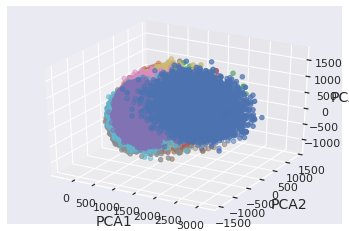

In [ ]:
import numpy as np
import numba
import pandas as pd
import scipy.special
import scipy.stats as st

# Package to perform PCA
import sklearn.datasets
import sklearn.decomposition

# BE/Bi 103 Utilities from Justin
# import bebi103

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

# Make Matplotlib plots appear inline
%matplotlib inline

import bokeh

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['indigo','b', 'c', 'k', 'g', 'm', 'w', 'r', 'y', 'lightgreen']

for clas, color in zip(classes, colors):
    ax.scatter(pandasDF.loc[pandasDF['label'] == clas, 'PCA[0]'],
               pandasDF.loc[pandasDF['label'] == clas, 'PCA[1]'],
               pandasDF.loc[pandasDF['label'] == clas, 'PCA[2]'],
               ) 
      
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()